# Problem Statement 

##### How might we design and develop a comprehensive predictive model that is capable of assessing skin cancer probabilities and identifying various types of skin cancer by integrating demographic factors such as age, gender, and potentially nationality?

## Data Acquisition 

#### This Dataset is from the ISIC Challenge 2020


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
# load dataset
df = pd.read_csv('ISIC_2020_Training_GroundTruth_v2.csv')

# print data types of variables
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   lesion_id                      33126 non-null  object 
 3   sex                            33061 non-null  object 
 4   age_approx                     33058 non-null  float64
 5   anatom_site_general_challenge  32599 non-null  object 
 6   diagnosis                      33126 non-null  object 
 7   benign_malignant               33126 non-null  object 
 8   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 2.3+ MB
None


In [4]:
# Display first 5 data rows
df.head()

,image_name,patient_id,lesion_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,IL_7972535,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,IL_4649854,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,IL_9087444,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,IL_4255399,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,IL_6898037,female,55.0,upper extremity,unknown,benign,0


In [5]:
# Display summary statistics
print(df.describe())

         age_approx        target
count  33058.000000  33126.000000
mean      48.870016      0.017630
std       14.380360      0.131603
min        0.000000      0.000000
25%       40.000000      0.000000
50%       50.000000      0.000000
75%       60.000000      0.000000
max       90.000000      1.000000


In [6]:
# Check for missing values
print(df.isnull().sum())

image_name                         0
patient_id                         0
lesion_id                          0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64


In [7]:
# Remove rows with missing values
df_cleaned = df.dropna()

## Univariate Analysis - Exploration of Variables one by one    
-Visualisation of Categorical variables - understand the distribution of each variable.

-Visualisation of Continuous variables - understand the central tendency and spread of the variable.

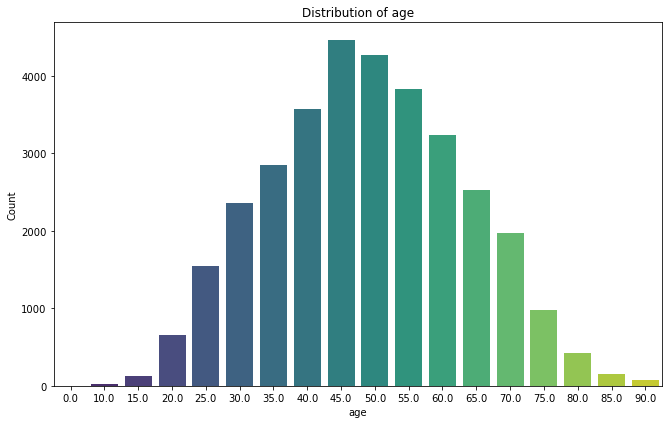

In [8]:
# Countplot for age - Categorical variable
plt.figure(figsize=(18, 6)) 

plt.subplot(1, 2, 1)
sns.countplot(x=df['age_approx'], palette='viridis')
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Count')

# Add some space between subplots
plt.tight_layout()

plt.show()

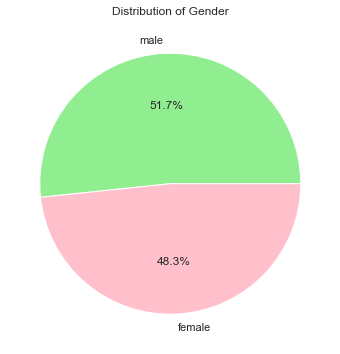

In [17]:
# Display gender distribution in pie chart
plt.figure(figsize=(8, 6))
gender_counts = df['sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'pink'])
plt.title('Distribution of Gender')
plt.show()

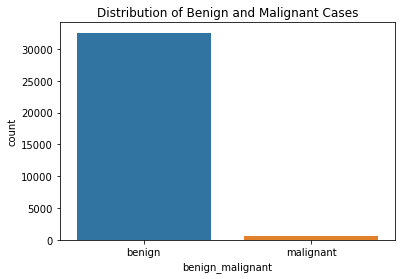

In [10]:


# Assuming your DataFrame is named 'df'
sns.countplot(x='benign_malignant', data=df)
plt.title('Distribution of Benign and Malignant Cases')
plt.show()


## Multivariate Analysis - Exploration of relationship between two or more variables

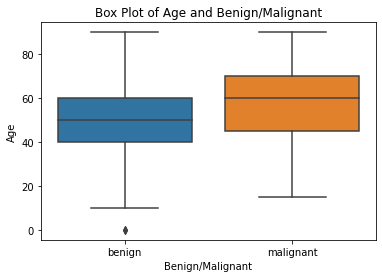

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='benign_malignant', y='age_approx', data=df)
plt.title('Box Plot of Age and Benign/Malignant')
plt.xlabel('Benign/Malignant')
plt.ylabel('Age')
plt.show()


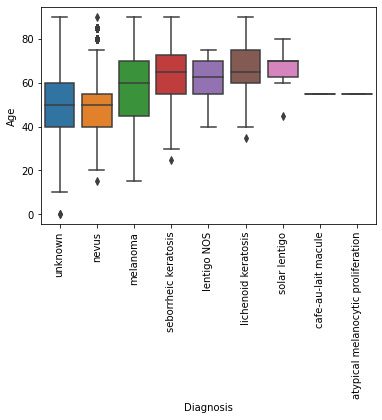

In [12]:
# Create box plots for age by diagnosis
sns.boxplot(x='diagnosis', y='age_approx', data=df)
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()


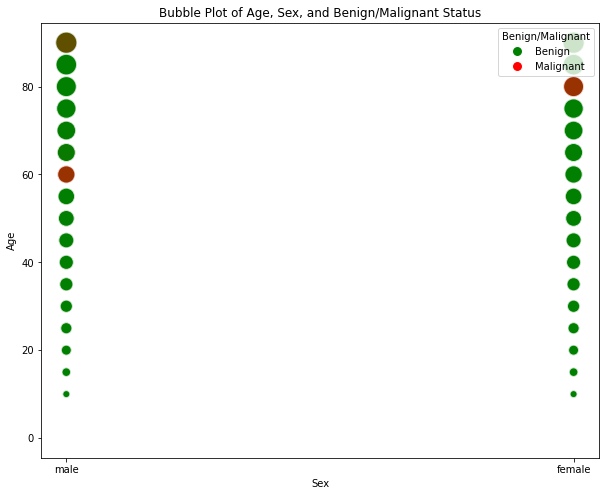

In [13]:
df_cleaned = df.dropna(subset=['age_approx', 'sex'])

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Map colors to 'benign_malignant' categories
colors = {'benign': 'green', 'malignant': 'red'}
df_cleaned['color'] = df_cleaned['benign_malignant'].map(colors)

# Scatter plot with bubble size based on age
scatter = ax.scatter(
    x=df_cleaned['sex'],
    y=df_cleaned['age_approx'],
    c=df_cleaned['color'],
    s=df_cleaned['age_approx'] * 5,  # Adjust the multiplier for bubble size
    alpha=0.6,
    edgecolors='w',  # White edge for better visibility
)

# Create a legend
legend_labels = {'benign': 'Benign', 'malignant': 'Malignant'}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=10, label=legend_labels[label]) for label in colors]

# Add legend to the plot
ax.legend(handles=legend_handles, title='Benign/Malignant', loc='upper right')

# Set axis labels and title
ax.set_xlabel('Sex')
ax.set_ylabel('Age')
ax.set_title('Bubble Plot of Age, Sex, and Benign/Malignant Status')

# Show the plot
plt.show()

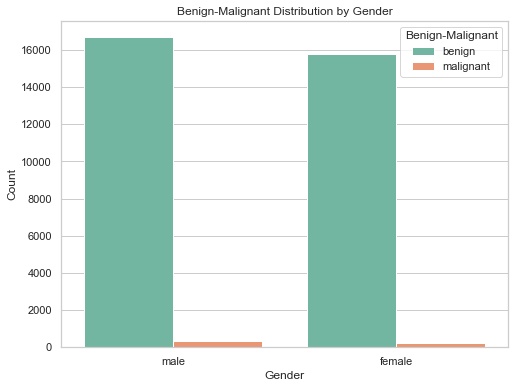

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Create a grouped bar plot between 'sex' and 'diagnosis'
sns.countplot(x='sex', hue='benign_malignant', data=df, palette='Set2')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Benign-Malignant Distribution by Gender')

# Show the plot
plt.legend(title='Benign-Malignant', loc='upper right')
plt.show()